In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
%matplotlib inline
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 200

In [3]:
#utils.py is where all our custom functions live is we set an autoreload on it.
%aimport utils 
from utils import *
%aimport viz_utils 
from viz_utils import *

# Loading the data

In [4]:
df_all = pd.read_excel('all data v3.xlsx', 'iLab data.txt', index_col=None, na_values=['NA'])

# Functions we might need

In [9]:
def get_key_ideas(df):
    
    def format_time(t):
        mins = int(t/60)
        secs = int(t-mins*60)
        return '{0}m {1}s'.format(mins,secs)

    #merge method from right and left side
    df['Cleaned joined methods'] = df['Cleaned method 1'].map(str) + ' | ' + df['Cleaned method 2']
    #edit actions so weither they are from the right side or left doesn't matter
    # ie. delete1 and delete2 -> delete
    df['Selection_unsided'] = [s.replace('1','').replace('2','') for s in list(df['Selection'].map(str))]
    #remove all consecutive duplicate actions
    # ie. delete delete delete -> delete NaN NaN
    df['Selection_unsided'] = df['Selection_unsided'].loc[df['Selection_unsided'].shift() != df['Selection_unsided']]

    #Now we can find all submitted ideas on first submit and first delete
    # we don't need to make it as a "set" anymore!
#     submitted_ideas = set(df[df['Selection'].str.contains('submit',na=False)]['Cleaned joined methods'])
#     deleted_all_ideas = set(df[df['Selection'].str.contains('deleteAll',na=False)]['Cleaned joined methods'])
    submitted_ideas = df[df['Selection'].str.contains('submit',na=False)][['Selection','Time_seconds','Cleaned joined methods']]
    deleted_ideas = df[df['Selection'].str.contains('delete',na=False)][['Selection','Time_seconds','Cleaned joined methods']]
    ideas = pd.concat([deleted_ideas,submitted_ideas])
    #remove empty methods
    ideas = ideas[ideas['Cleaned joined methods'].str.contains("st1 | st1", regex=False) == False]
    ideas['timestamp'] = ideas[['Time_seconds']].applymap(lambda t: format_time(t))
    return ideas

# Plotting the 9 pairs for analysis
Along with the time coordinates of the ideas they had (i.e. their methods before a delete all or a submit)

Note: students may have used a method multiple times, only the 1st time coordinate when the method was deleted/submitted is shown for simplicity.

In [10]:
pd.set_option('display.width', 1000)

In [11]:
from tabulate import tabulate

Student Pair: L70970875:120f77e742b:-8000


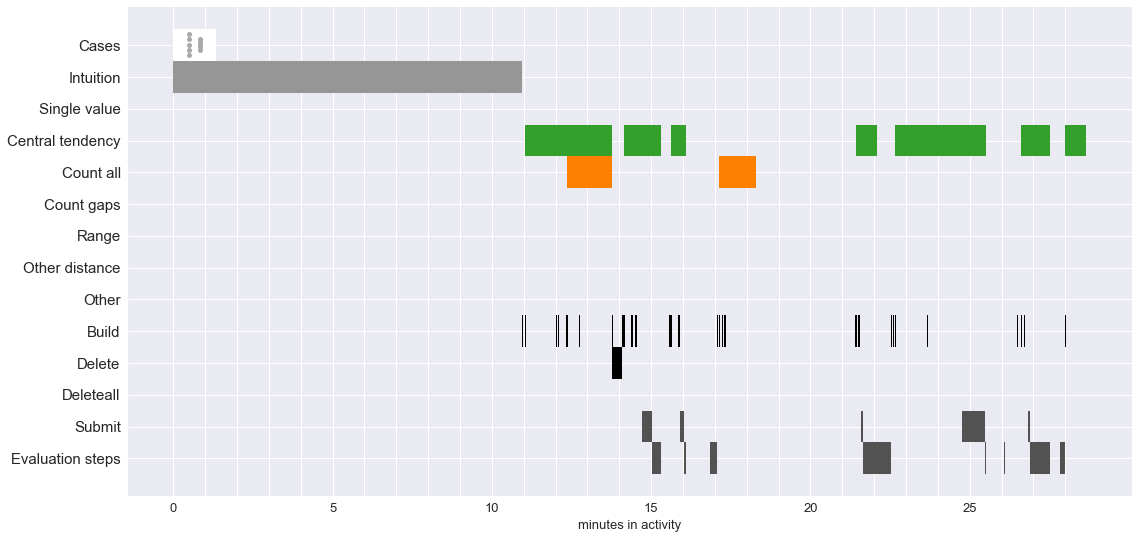

,Selection,timestamp,Cleaned joined methods
0,submit,14m 42s,st1 Median all | st1 Median all
1,submit,15m 55s,st1 Average all | st1 Average all
2,submit,21m 35s,st1 Average all | st1 Average all
3,submit,24m 45s,st1 - Median | st1 - Median all
4,submit,26m 49s,st1 Average all | st1 Average all





-------------------------------------------------------
Student Pair: L-32a989cf:120ecd7e93b:-8000


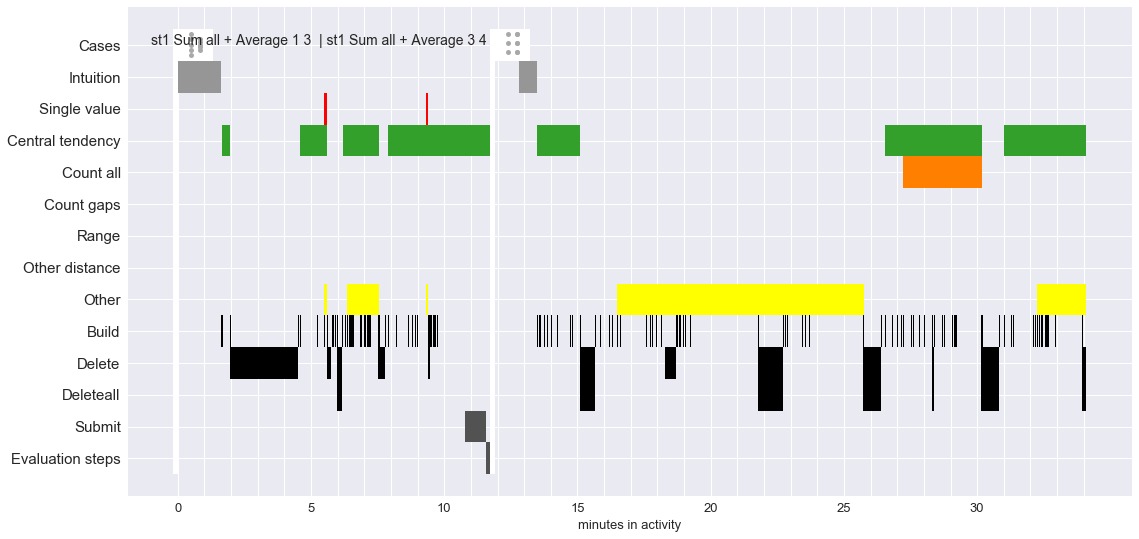

,Selection,timestamp,Cleaned joined methods
0,delete2,9m 24s,st1 Sum all + Average 1 3 | st1
1,delete2,9m 25s,st1 Sum all + Average 1 3 | st1
2,deleteAll2,15m 5s,st1 Sum all + Average 2 5 | st1
3,delete2,18m 16s,st1 Count 2 5 x Count 8 | st1
4,deleteAll2,21m 46s,st1 Count 2 5 x Count 8 | st1
5,deleteAll2,28m 19s,st1 Median all / Count all | st1
6,deleteAll2,30m 9s,st1 Median all / Count all | st1
7,submit,10m 47s,st1 Sum all + Average 1 3 | st1 Sum all + Average 3 4





-------------------------------------------------------
Student Pair: L40bb98dd:120c3a7683a:-8000


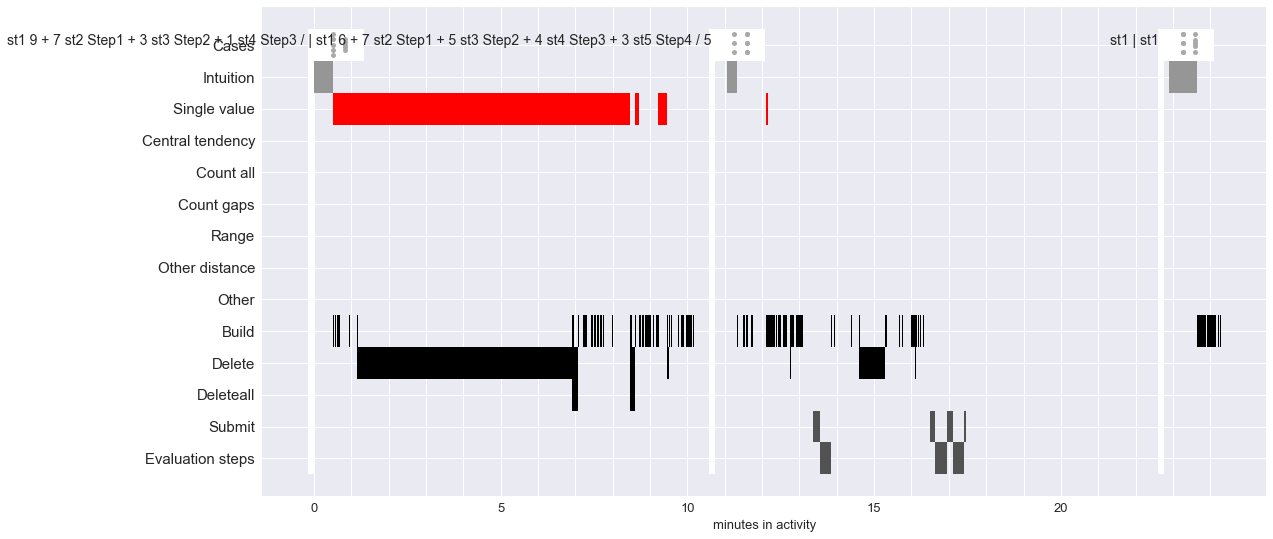

,Selection,timestamp,Cleaned joined methods
0,delete1,1m 9s,st1 9 + 7 | st1 7
1,deleteAll2,8m 28s,st1 9 + 7 st2 Step1 + 3 st3 Step2 + 1 st4 Step3 / | st1
2,deleteAll2,8m 29s,st1 9 + 7 st2 Step1 + 3 st3 Step2 + 1 st4 Step3 / | st1
3,delete2,9m 27s,st1 9 + 7 st2 Step1 + 3 st3 Step2 + 1 st4 Step3 / | st1 6 + 7 st2 Step1 + 5 st3 Step2 + 4
4,delete2,12m 44s,st1 8 + 5 st2 Step1 + 2 | st1 8 + 8 st2 Step1 + 5 st3 Step2 + 5
5,delete2,14m 35s,st1 8 + 5 st2 Step1 + 2 st3 | st1 8 + 8 st2 Step1 + 5 st3 Step2 + 5 st4 Step3 + 2 st5 Step4 + 2
6,delete1,16m 6s,st1 8 + 5 st2 Step1 + 2 | st1 8 + 8 st2 Step1 + 5 st3 Step2 + 5 st4 Step3 + 2 st5 Step4 + 2 st6 Step5 / 5
7,submit,10m 36s,st1 9 + 7 st2 Step1 + 3 st3 Step2 + 1 st4 Step3 / | st1 6 + 7 st2 Step1 + 5 st3 Step2 + 4 st4 Step3 + 3 st5 Step4 / 5
8,submit,13m 21s,st1 8 + 5 st2 Step1 + 2 | st1 8 + 8 st2 Step1 + 5 st3 Step2 + 5 st4 Step3 + 2 st5 Step4 + 2
9,submit,16m 30s,st1 8 + 5 st2 Step1 + 2 st3 Step2 / 5 | st1 8 + 8 st2 Step1 + 5 st3 Step2 + 5 st4 Step3 + 2 st5 Step4 + 2 st6 Step5 / 5





-------------------------------------------------------
Student Pair: L-7821f52f:120f7fb42ba:-8000


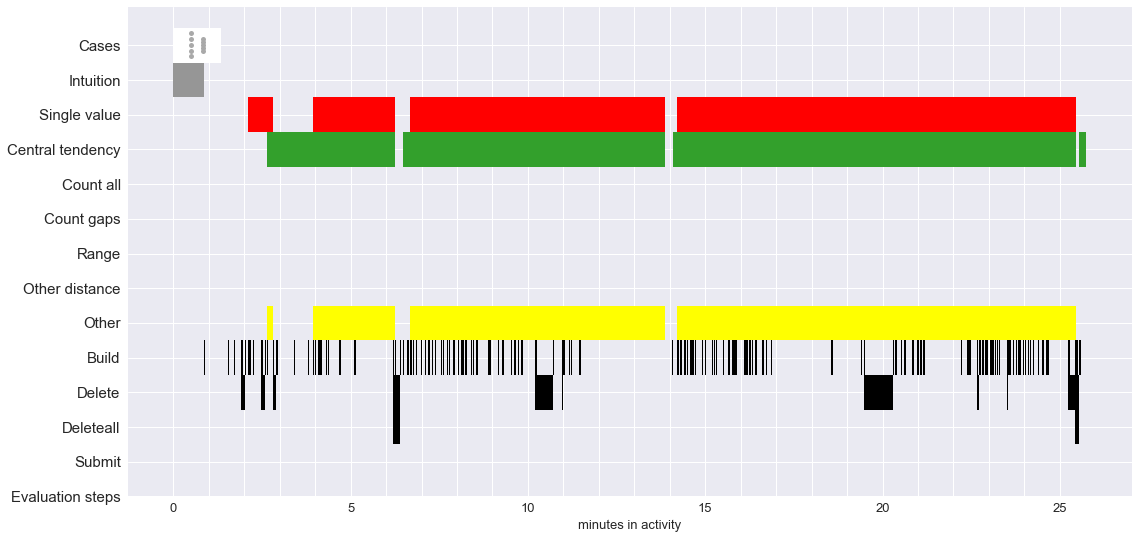

,Selection,timestamp,Cleaned joined methods
0,delete2,2m 49s,st1 Average all | st1
1,delete2,10m 12s,st1 Average all x 5 st2 Average all x 9 st3 Average all x 1 st4 Average all x 7 | st1 Average all x 6 st2 Average all x 7 st3 Sum all x 5
2,delete2,10m 14s,st1 Average all x 5 st2 Average all x 9 st3 Average all x 1 st4 Average all x 7 | st1 Average all x 6 st2 Average all x 7
3,delete1,10m 57s,st1 Average all x 5 st2 Average all x 9 st3 Average all x 1 | st1 Average all x 6 st2 Average all x 7 st3
4,delete1,10m 58s,st1 Average all x 5 | st1 Average all x 6 st2 Average all x 7 st3
5,delete1,19m 28s,st1 Average all x 1 st2 Average all x 9 st3 Sum Average all x 5 st4 Average all x 3 | st1 Average all x 3 st2 Average all x 5 st3 Average all x 4 st4 Average all
6,delete2,22m 40s,st1 Average all x 1 st2 Average all x 9 st3 Sum Average all x 5 st4 Average all x 3 st5 Average all - 7 st6 Average all - 1 st7 Step1 - Step5 st8 | st1 Average all x 3 st2 Average all x 5 st3 Aver...
7,delete2,23m 30s,st1 Average all x 1 st2 Average all x 9 st3 Sum Average all x 5 st4 Average all x 3 st5 Average all - 7 st6 Average all - 1 st7 Step1 - Step5 st8 | st1 Average all x 3 st2 Average all x 5 st3 Aver...
8,delete1,25m 13s,st1 Average all x 1 st2 Average all x 9 st3 Sum Average all x 5 st4 Average all x 3 st5 Average all - 7 st6 Average all - 1 st7 Step1 - Step5 | st1 Average all x 3 st2 Average all x 5 st3 Average ...
9,delete1,25m 15s,st1 Average all x 1 st2 Average all x 9 st3 Sum Average all x 5 st4 Average all x 3 st5 Average all - 7 | st1 Average all x 3 st2 Average all x 5 st3 Average all x 4 st4 Average all - 5 st5 Averag...





-------------------------------------------------------
Student Pair: L651ef9df:120f7fb65f2:-8000


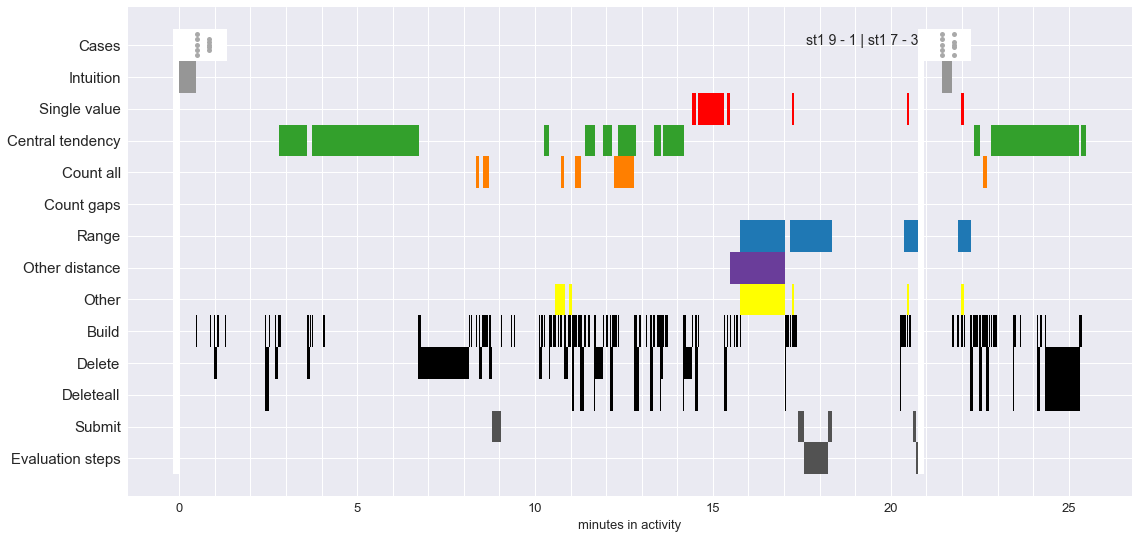

,Selection,timestamp,Cleaned joined methods
0,delete2,6m 43s,st1 Average all | st1
1,delete1,10m 49s,st1 9 x 5 | st1
2,deleteAll2,24m 7s,st1 Median all | st1
3,submit,17m 23s,st1 9 - 1 | st1 7 - 3
4,submit,18m 14s,st1 9 - 1 | st1 7 - 3
5,submit,20m 38s,st1 9 - 1 | st1 7 - 3





-------------------------------------------------------
Student Pair: L46c6b7c:120ed2665a4:-8000


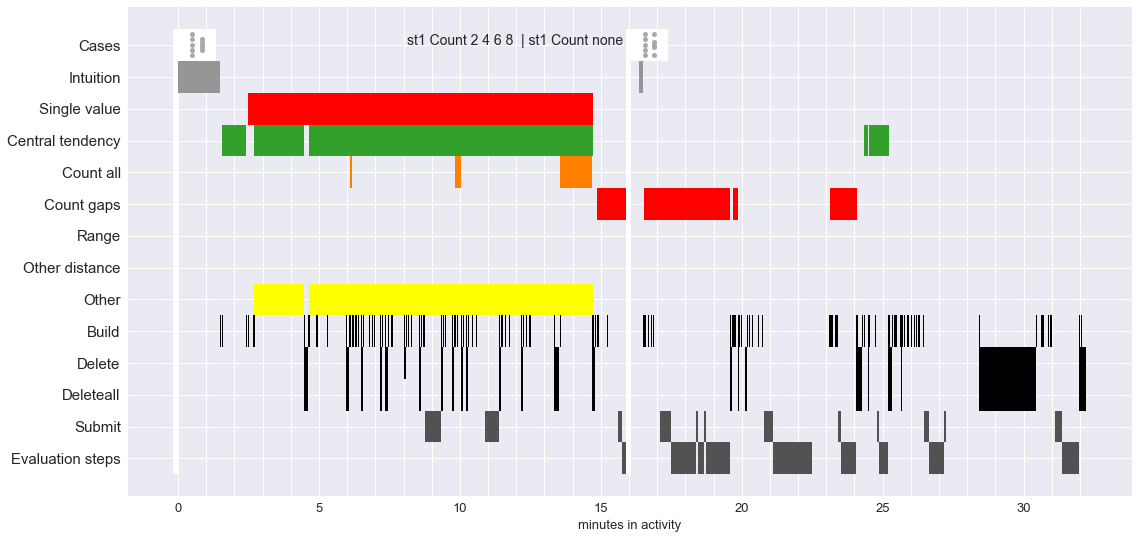

,Selection,timestamp,Cleaned joined methods
0,deleteAll2,5m 57s,st1 Sum all / 5 st2 | st1
1,deleteAll2,6m 30s,st1 Sum all / 5 st2 | st1
2,deleteAll2,7m 10s,st1 Sum all / 5 st2 | st1
3,deleteAll2,7m 20s,st1 Sum all / 5 st2 | st1
4,delete2,8m 2s,st1 Sum all / 5 st2 | st1
5,submit,8m 46s,st1 Sum all / 5 | st1 Sum all / 5
6,submit,10m 53s,st1 Sum all / 5 | st1 Sum all / 5
7,submit,15m 37s,st1 Count 2 4 6 8 | st1 Count none
8,submit,17m 6s,st1 Count 2 4 6 8 | st1 Count 3 2 8 7
9,submit,18m 23s,st1 Count 2 4 6 8 | st1 Count 3 2 8 7





-------------------------------------------------------
Student Pair: L-10f11766:120ecd4f63a:-8000


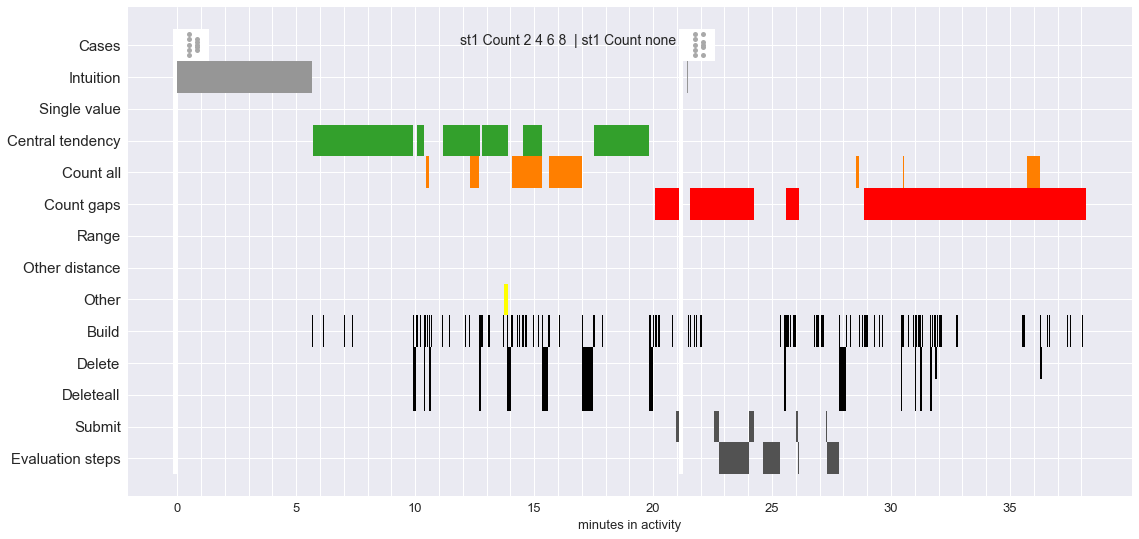

,Selection,timestamp,Cleaned joined methods
0,deleteAll2,15m 19s,st1 Count all + Sum all | st1
1,deleteAll2,30m 26s,st1 Count choose... 2 4 6 8 + | st1
2,deleteAll2,31m 1s,st1 Count choose... 2 4 6 8 + | st1
3,deleteAll2,31m 14s,st1 Count choose... 2 4 6 8 + | st1
4,deleteAll2,31m 38s,st1 Count choose... 2 4 6 8 + | st1
5,delete2,31m 52s,st1 Count choose... 2 4 6 8 + | st1
6,submit,20m 58s,st1 Count 2 4 6 8 | st1 Count none
7,submit,22m 33s,st1 Count 2 6 4 8 | st1 Count 3 2 7 8
8,submit,24m 3s,st1 Count 2 6 4 8 | st1 Count 3 2 7 8
9,submit,26m 1s,st1 Count 2 6 4 8 | st1 Count 3 2 7 8





-------------------------------------------------------
Student Pair: L-160920ae:120ed3b11b6:-8000


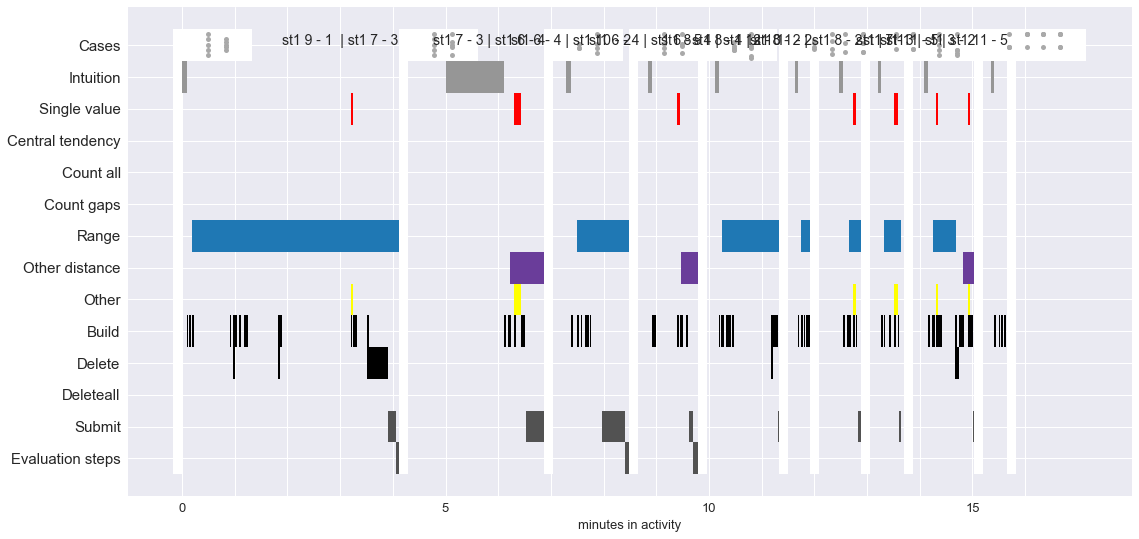

,Selection,timestamp,Cleaned joined methods
0,delete1,0m 58s,st1 9 - 1 | st1
1,delete1,1m 49s,st1 9 - 1 | st1
2,delete1,3m 31s,st1 9 - 1 | st1 7 - 3
3,delete2,11m 11s,st1 8 - 4 | st1
4,submit,3m 55s,st1 9 - 1 | st1 7 - 3
5,submit,6m 32s,st1 7 - 3 | st1 6 - 4
6,submit,7m 58s,st1 6 - 4 | st1 10 - 2
7,submit,9m 37s,st1 6 - 4 | st1 6 - 5
8,submit,11m 19s,st1 8 - 4 | st1 12 - 0
9,submit,11m 57s,st1 8 - 4 | st1 11 - 2





-------------------------------------------------------
Student Pair: L-2567b17a:120eda25685:-8000


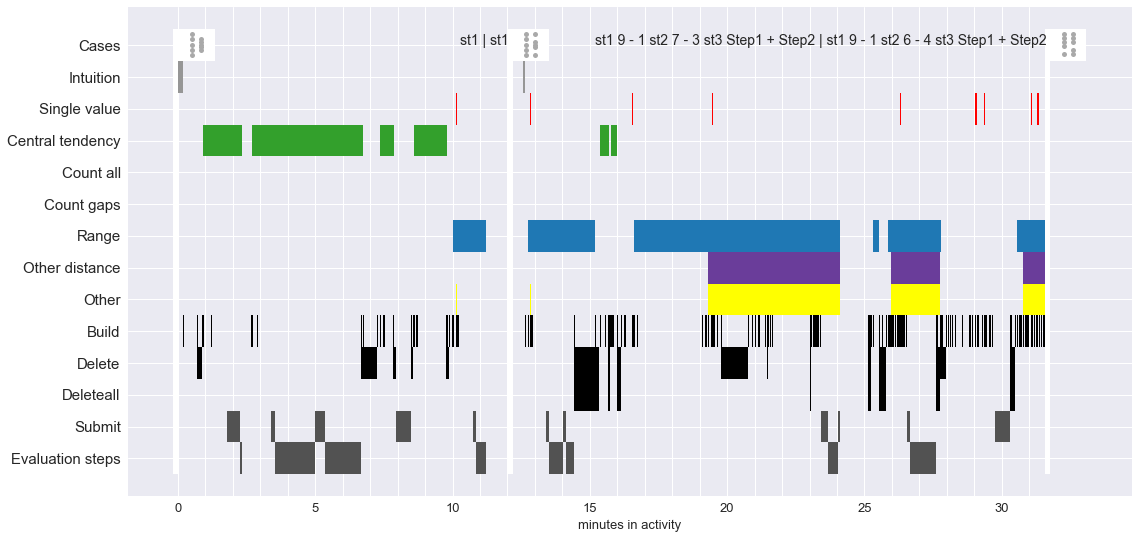

,Selection,timestamp,Cleaned joined methods
0,deleteAll2,14m 26s,st1 9 - 1 | st1
1,delete2,19m 47s,st1 9 - 1 st2 7 - 3 | st1 9 - 1 st2 6 - 4
2,delete2,21m 27s,st1 9 - 1 st2 7 - 3 st3 Step1 - Step2 | st1 9 - 1 st2 6 - 4
3,submit,1m 48s,st1 Average all | st1 Average all
4,submit,3m 23s,st1 Average all | st1 Average all
5,submit,5m 0s,st1 Average all | st1 Average all
6,submit,7m 56s,st1 Sum | st1
7,submit,10m 45s,st1 9 - 1 | st1 7 - 3
8,submit,13m 24s,st1 9 - 1 | st1 9 - 1
9,submit,14m 1s,st1 9 - 1 | st1 9 - 1





-------------------------------------------------------


In [12]:
%aimport viz_utils 
session_pairs = ["L70970875:120f77e742b:-8000",
    "L-32a989cf:120ecd7e93b:-8000",
    "L40bb98dd:120c3a7683a:-8000",
    "L-7821f52f:120f7fb42ba:-8000",
    "L651ef9df:120f7fb65f2:-8000",
    "L46c6b7c:120ed2665a4:-8000",
    "L-10f11766:120ecd4f63a:-8000",
    "L-160920ae:120ed3b11b6:-8000",
    "L-2567b17a:120eda25685:-8000"]

for session in session_pairs:
    print "Student Pair:", session
    df = prepare_session(df_all,session)
    plot(df,to_plot,colors, column_to_use, function_to_use)
    ideas = get_key_ideas(df)
    print "\n"
    ideas.reset_index(drop=True, inplace=True)
    display(ideas[['Selection','timestamp','Cleaned joined methods']])
    print "\n\n\n-------------------------------------------------------"